# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []


In [5]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
city_country = zip(cities,countries)
# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Import API key
from api_keys import weather_api_key
#print(weather_api_key)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

In [7]:
#start counter for cities
number = 1
#Create list for requirements 
city_id = []
city_name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []

# Create loop through cities and get data
print('Start of list')
# API call to weather map
for city in cities:
    try:
        city_info = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_info['name'])
        lat.append(city_info['coord']['lat'])
        lng.append(city_info['coord']['lon'])
        temp.append(city_info['main']['temp'])
        humidity.append(city_info['main']['humidity'])
        cloudiness.append(city_info['clouds']['all'])
        wind.append(city_info['wind']['speed'])
        country.append(city_info['sys']['country'])
        print(f'City number {number} of {len(cities)}complete. | Added {city}')
        number = number + 1
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
print('End of list')
        
        

Start of list
City number 1 of 596complete. | Added ushuaia
City number 2 of 596complete. | Added novosheshminsk
City number 3 of 596complete. | Added anloga
City number 4 of 596complete. | Added arraial do cabo
City number 5 of 596complete. | Added okakarara
City number 6 of 596complete. | Added port elizabeth
City number 7 of 596complete. | Added hasaki
City number 8 of 596complete. | Added narsaq
Missing data in city number 9 of 596. | Skipping taolanaro
City number 10 of 596complete. | Added kaeo
City number 11 of 596complete. | Added rikitea
City number 12 of 596complete. | Added punta arenas
City number 13 of 596complete. | Added bredasdorp
City number 14 of 596complete. | Added vaini
City number 15 of 596complete. | Added sao joao da barra
City number 16 of 596complete. | Added albany
City number 17 of 596complete. | Added linden
City number 18 of 596complete. | Added mao
City number 19 of 596complete. | Added tasiilaq
City number 20 of 596complete. | Added severo-kurilsk
City n

City number 166 of 596complete. | Added cayenne
City number 167 of 596complete. | Added chuy
City number 168 of 596complete. | Added souillac
City number 169 of 596complete. | Added iqaluit
City number 170 of 596complete. | Added langfang
City number 171 of 596complete. | Added chimore
City number 172 of 596complete. | Added tara
City number 173 of 596complete. | Added shar
City number 174 of 596complete. | Added victoria
City number 175 of 596complete. | Added san lawrenz
City number 176 of 596complete. | Added adrar
City number 177 of 596complete. | Added ribeira grande
City number 178 of 596complete. | Added kharp
City number 179 of 596complete. | Added olinda
Missing data in city number 180 of 596. | Skipping tsihombe
City number 181 of 596complete. | Added vila franca do campo
Missing data in city number 182 of 596. | Skipping wanderlandia
City number 183 of 596complete. | Added touros
City number 184 of 596complete. | Added tura
City number 185 of 596complete. | Added kargasok
Mi

Missing data in city number 329 of 596. | Skipping kudchi
City number 330 of 596complete. | Added port blair
City number 331 of 596complete. | Added bayir
City number 332 of 596complete. | Added lavumisa
City number 333 of 596complete. | Added vestmanna
City number 334 of 596complete. | Added atbasar
Missing data in city number 335 of 596. | Skipping samusu
City number 336 of 596complete. | Added ambilobe
City number 337 of 596complete. | Added dawei
City number 338 of 596complete. | Added anadyr
City number 339 of 596complete. | Added balboa
City number 340 of 596complete. | Added broome
Missing data in city number 341 of 596. | Skipping tumannyy
City number 342 of 596complete. | Added lensk
City number 343 of 596complete. | Added antofagasta
Missing data in city number 344 of 596. | Skipping paytug
City number 345 of 596complete. | Added katsuura
City number 346 of 596complete. | Added dickson
City number 347 of 596complete. | Added esperance
Missing data in city number 348 of 596. |

City number 494 of 596complete. | Added diego de almagro
City number 495 of 596complete. | Added nishihara
City number 496 of 596complete. | Added pisco
City number 497 of 596complete. | Added miraflores
City number 498 of 596complete. | Added mildura
City number 499 of 596complete. | Added odweyne
City number 500 of 596complete. | Added westport
Missing data in city number 501 of 596. | Skipping manzil tamim
City number 502 of 596complete. | Added portland
City number 503 of 596complete. | Added hovd
City number 504 of 596complete. | Added capao da canoa
City number 505 of 596complete. | Added sombrio
City number 506 of 596complete. | Added dibulla
City number 507 of 596complete. | Added aswan
City number 508 of 596complete. | Added erdenet
City number 509 of 596complete. | Added mnogovershinnyy
City number 510 of 596complete. | Added pirenopolis
City number 511 of 596complete. | Added chatham
City number 512 of 596complete. | Added hami
City number 513 of 596complete. | Added san-ped

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create dataframe for requirements 
city_info_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humidity,
                            'Cloudiness': cloudiness,
                            'Wind Speed': wind,
                            'Country': country})
# Save dataframe to csv file
pd.DataFrame.to_csv(city_info_df, 'city_info2.csv')
city_info_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,Ushuaia,-54.80,-68.30,41.00,75,75,26.40,AR
1,Novosheshminsk,55.07,51.23,31.60,85,60,7.87,RU
2,Anloga,5.79,0.90,80.60,88,20,3.36,GH
3,Arraial do Cabo,-22.97,-42.03,74.10,68,14,6.60,BR
4,Okakarara,-20.58,17.43,57.99,34,0,5.73,NA


In [10]:
city_count = city_info_df.count()
print(city_count)

City           539
Latitude       539
Longitude      539
Temperature    539
Humidity       539
Cloudiness     539
Wind Speed     539
Country        539
dtype: int64


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# Summary stats
print(city_info_df.describe())

         Latitude   Longitude  Temperature    Humidity  Cloudiness  Wind Speed
count  539.000000  539.000000   539.000000  539.000000  539.000000  539.000000
mean    21.232189   15.400909    59.007199   68.538033   55.821892    7.955844
std     33.707555   91.168536    19.828166   22.162209   38.252072    5.668374
min    -54.800000 -175.200000    -0.400000    7.000000    0.000000    0.250000
25%     -7.040000  -67.940000    43.450000   57.000000   18.000000    3.465000
50%     27.820000   20.230000    61.000000   74.000000   73.000000    6.730000
75%     49.390000   95.725000    76.475000   86.500000   93.000000   10.635000
max     78.220000  179.320000    95.000000  100.000000  100.000000   34.580000


In [12]:
# Cities with hummidity >100%
humid_cities = city_info_df.loc[city_info_df["Humidity"]>100].count()
print(humid_cities)

City           0
Latitude       0
Longitude      0
Temperature    0
Humidity       0
Cloudiness     0
Wind Speed     0
Country        0
dtype: int64


In [13]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [15]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

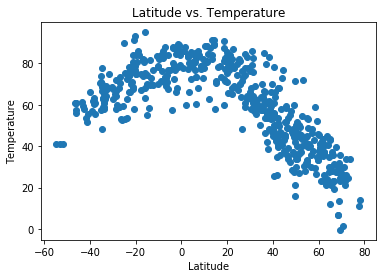

In [16]:
# Scatter Plot of latitude vs. temperature 
plt.scatter(city_info_df['Latitude'], city_info_df['Temperature']);
plt.title(f'Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

The scatter plot shows the temperature rising as the latitude gets closer to the equator. 
The scatter plot also shows the temperature drop as it gets further away from the equator.

## Latitude vs. Humidity Plot

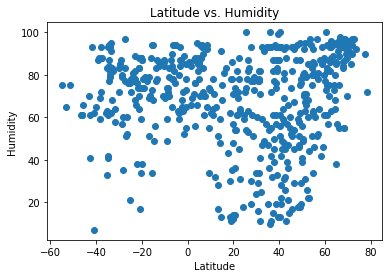

In [17]:
# Scatter Plot of latitude vs. humidity 
plt.scatter(city_info_df['Latitude'], city_info_df['Humidity']);
plt.title(f'Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

The scatter plot shows that there is no pattern in the data. At a first glance it looks like humidity is greater as the latitude increases but there is no definate correlation. 

## Latitude vs. Cloudiness Plot

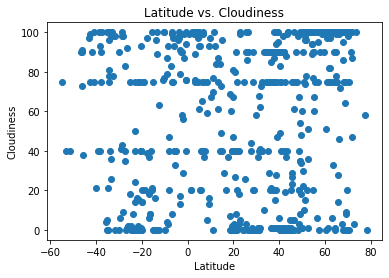

In [18]:
# Scatter Plot of latitude vs. temperature 
plt.scatter(city_info_df['Latitude'], city_info_df['Cloudiness']);
plt.title(f'Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

There is no pattern with this data. I do not believe there is a correlation between cloudiness and latitude. 

## Latitude vs. Wind Speed Plot

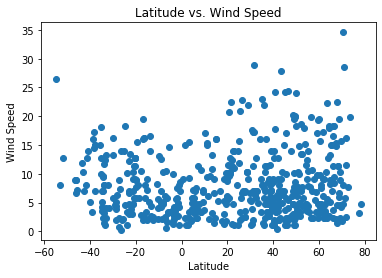

In [19]:
# Scatter Plot of latitude vs. temperature 
plt.scatter(city_info_df['Latitude'], city_info_df['Wind Speed']);
plt.title(f'Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()

It looks like the wind speed could be correlated with latitude but there is not a difinitive pattern. 

## Linear Regression

In [20]:
# OPTIONAL: Create a function to create Linear Regression plots

In [21]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_info_df.loc[city_info_df["Latitude"]>=0]
#northern_hemisphere_df.count
southern_hemisphere_df = city_info_df.loc[city_info_df["Latitude"]<=0]
#southern_hemisphere_df.count

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.92x + 90.95
The r-squared is: 0.7664387181970702


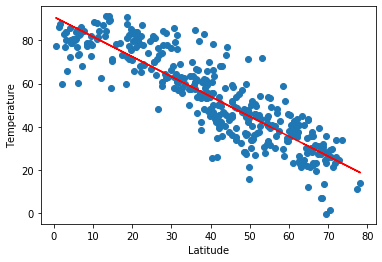

In [22]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is a negative correlation between max temperature and the latitude. the r-squared value is above .65 which is an indicator that there is a strong correlation in the data. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.57x + 83.07
The r-squared is: 0.47467614024500976


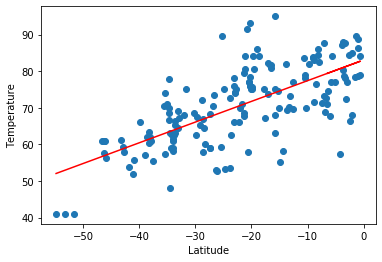

In [23]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is a positive correlation with the data but the r-square value is below .65, indicating there is not a strong correlation. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.24x + 57.19
The r-squared is: 0.038115461381830786


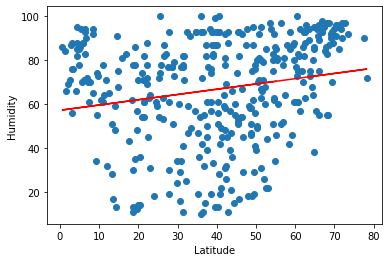

In [24]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between humidity and latitude. The r-square value is very close to 0.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.17x + 76.22
The r-squared is: 0.018749725203739298


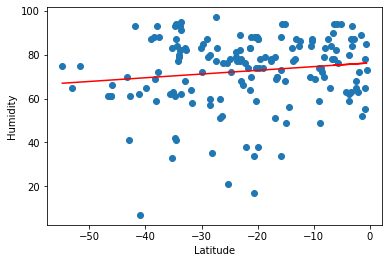

In [25]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is no correlation, the r-square value is close to 0. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.23x + 47.43
The r-squared is: 0.014072352732044833


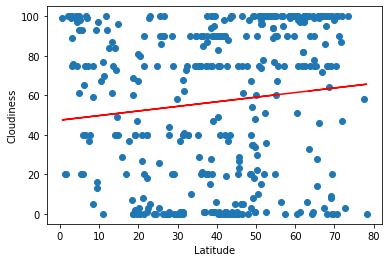

In [26]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between cloudiness and latitude. The r-square value is very close to 0.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.05x + 52.53
The r-squared is: 0.00033920173590793764


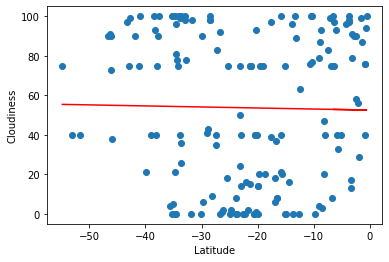

In [27]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between cloudiness and latitude. The r-square value is very close to 0.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.04x + 6.46
The r-squared is: 0.019888654556700015


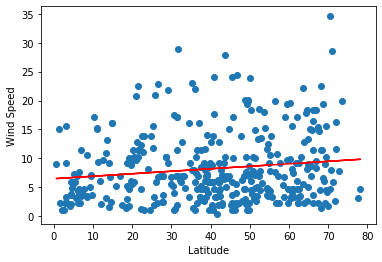

In [28]:
x_values = northern_hemisphere_df["Latitude"]
y_values = northern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between wind speed and latitude. The r-square value is very close to 0.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.12x + 4.85
The r-squared is: 0.10176936752709828


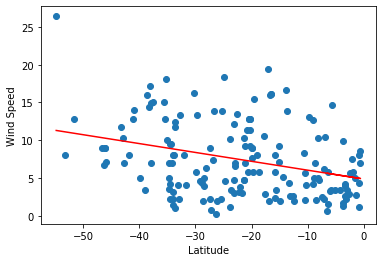

In [29]:
x_values = southern_hemisphere_df["Latitude"]
y_values = southern_hemisphere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,xy=(-10,-20), xytext=(10,3),fontsize=15,color="red")
print(line_eq)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

There is not a correlation between wind speed and latitude. The r-square value is very close to 0.